# _*Using Grover's Algorithm to Perform Quantum Search*_

This notebook demonstrates how to use the `Qiskit Aqua` library `Grover` search algorithm and process the result.

In [1]:
import pylab
import numpy as np
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

## Use Quantum Search to Find Solutions to 3-SAT Problems

Let's look at an example 3-Satisfiability (3-SAT) problem and walkthrough how we can use Quantum Search to find its satisfying solutions. 3-SAT problems are usually expressed in [Conjunctive Normal Forms (CNF)](https://en.wikipedia.org/wiki/Conjunctive_normal_form) and written in the [DIMACS-CNF](https://www.satcompetition.org/2009/format-benchmarks2009.html) format. For example:

In [2]:
input_3sat_instance = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

The CNF of this 3-SAT instance contains 3 variables and 5 clauses:

$(\neg v_1 \vee \neg v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee v_3) \wedge (v_1 \vee v_2 \vee \neg v_3) \wedge (v_1 \vee \neg v_2 \vee \neg v_3) \wedge (\neg v_1 \vee v_2 \vee v_3)$

It can be verified that this 3-SAT problem instance has three satisfying solutions:

$(v_1, v_2, v_3) = (T, F, T)$ or $(F, F, F)$ or $(T, T, F)$

Or, expressed using the DIMACS notation:

`1 -2 3`, or `-1 -2 -3`, or `1 2 -3`.

With this example problem input, we then create the corresponding `oracle` for our `Grover` search. In particular, we use the `LogicalExpressionOracle` component provided by Aqua, which supports parsing DIMACS-CNF format strings and constructing the corresponding oracle circuit.

In [3]:
oracle = LogicalExpressionOracle(input_3sat_instance)

The `oracle` can now be used to create an Grover instance:

In [4]:
grover = Grover(oracle)

We can then configure the backend and run the Grover instance to get the result:

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['result'])

[1, 2, -3]


As seen above, a satisfying solution to the specified 3-SAT problem is obtained. And it is indeed one of the three satisfying solutions.

Since we used the `'qasm_simulator'`, the complete measurement result is also returned, as shown in the plot below, where it can be seen that the binary strings `000`, `011`, and `101` (note the bit order in each string), corresponding to the three satisfying solutions all have high probabilities associated with them.

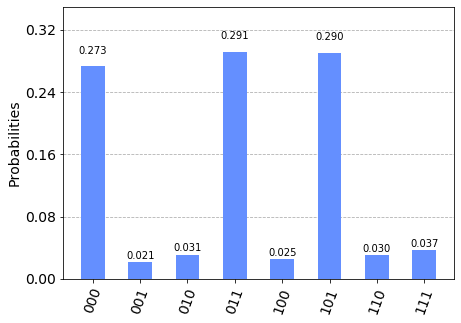

In [6]:
plot_histogram(result['measurement'])

## Quantum Search with Arbitrary Boolean Logical Expressions

Aqua's `Grover` can also be used to perform Quantum Search on `Oracle` constructed from means in addition to DIMACS. For example, the `LogicalExpressionOracle` can actually be configured using arbitrary Boolean logical expressions, as demonstrated below.

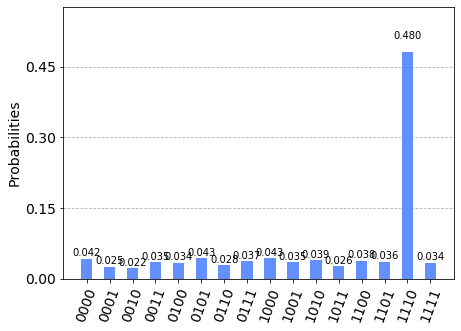

In [7]:
expression = '(w ^ x) & ~(y ^ z) & (x & y & z)'
oracle = LogicalExpressionOracle(expression)
grover = Grover(oracle)
result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result['measurement'])

In the example above, the input Boolean logical expression `'(w ^ x) & ~(y ^ z) & (x & y & z)'` should be quite self-explanatory, where `^`, `~`, and `&` represent the Boolean logical XOR, NOT, and AND operators, respectively. It should be quite easy to figure out the satisfying solution by examining its parts: `w ^ x` calls for `w` and `x` taking different values; `~(y ^ z)` requires `y` and `z` be the same; `x & y & z` dictates all three to be `True`. Putting these together, we get the satisfying solution `(w, x, y, z) = (False, True, True, True)`, which our `Grover`'s result agrees with.

## Quantum Search with Oracles from TruthTable

With Aqua, `Oracle`s can also be constructed from truth tables, meaning we can also perform Quantum Search on truth tables. Even though this might seem like a moot point as we would be essentially searching for entries of a truth table with the $1$ value, it'd a good example for demonstrative purpose.

In [8]:
truthtable = '1000000000000001'

As shown, the `truthtable` is specified with a bitstring containing values of all entries in the table. It has length $16$, so the corresponding truth table is of $4$ input bits. Since the very first and last values are $1$, the corresponding truth table target entries are `0000` and `1111`.

Next, we can setup the `Oracle` and `Grover` objects to perform Quantum Search as usual.

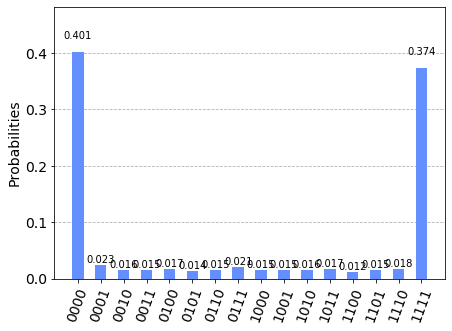

In [9]:
oracle = TruthTableOracle(truthtable)
grover = Grover(oracle)
result = grover.run(QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024))
plot_histogram(result['measurement'])

As shown, the search result coincides with our expectation.